# Countries' Diets and Covid Cases

In [103]:
#import dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import textwrap

In [68]:
#load files
#This file was downloaded from Kagle
food_supply_to_load = "COVID_Diet_Data/Food_Supply_Quantity_kg_Data.csv"

#Read file and store as dataframe and display orginal df
food_supply = pd.read_csv(food_supply_to_load)
food_supply.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


# The Section is the code to clean up the data we will be analyzing

In [69]:
#Count how many counties in the data and store in a variable
country_count = len(food_supply["Country"].unique())
country_count

170

In [70]:
#Top 10 countries with the most deaths
most_deaths = food_supply.sort_values("Deaths", ascending=False)
most_deaths

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
14,Belgium,5.3730,0.8559,17.7279,0.0010,6.6704,0.6487,1.1325,4.1623,3.2370,...,6.8161,32.2637,24.5,<2.5,6.286322,0.185428,0.000000,6.100894,11515000.0,%
138,Slovenia,4.9933,1.1248,18.9196,0.0005,7.6345,0.5376,0.6515,6.4367,4.1610,...,5.0020,31.0774,22.5,<2.5,8.235901,0.171755,7.312934,0.751213,2103000.0,%
159,United Kingdom,5.2632,0.2754,18.8798,0.0006,6.5412,0.6210,1.0911,4.9551,4.4181,...,4.5851,31.1116,29.5,<2.5,5.868483,0.167220,0.015161,5.686102,67160000.0,%
38,Czechia,9.8498,0.8945,17.8065,0.0006,5.6937,0.4964,0.5355,3.3962,4.7618,...,4.5289,32.1944,28.5,<2.5,9.612841,0.159845,8.555328,0.897667,10716000.0,%
74,Italy,3.1892,0.2834,19.0329,0.0005,8.5417,0.6247,1.5816,6.0207,4.2963,...,6.9463,30.9671,22.9,<2.5,4.353685,0.150927,3.494529,0.708229,60296000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Kiribati,0.2970,0.0486,8.8958,0.0000,8.2747,0.1640,6.1065,5.8907,2.3856,...,4.1389,41.1042,45.6,2.7,NaN,NaN,NaN,NaN,125000.0,%
81,"Korea, North",0.8981,0.0010,3.3933,0.0010,17.9378,0.4668,1.1568,6.1383,1.3872,...,12.8082,46.6046,7.1,47.8,NaN,NaN,NaN,NaN,25779000.0,%
105,Myanmar,0.2195,0.1751,13.5188,0.0034,16.7608,0.4613,4.0424,4.0287,4.9753,...,7.0725,36.4807,5.7,10.6,NaN,NaN,NaN,NaN,54704000.0,%
109,New Caledonia,5.0363,0.0821,11.7818,0.0804,8.5840,0.7494,2.0361,5.5855,5.8687,...,5.5941,38.2208,NaN,7.1,NaN,NaN,NaN,NaN,295000.0,%


In [71]:
#We are creating a new dataframe that will combine different columns that are similar and print it out
categories = food_supply.copy()
categories.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [72]:
#Add new columns where we are going to add the data from the similar columns
categories["Sugars %"] = ""
categories["Aquatic Seafood %"] = ""
categories["Meats & Animal Products %"] = ""
categories["Vegetables %"] = ""
categories["Other %"] = ""

In [73]:
#We will combine these columns into Sugar column and printing it out to make sure it worked
categories["Sugars (%)"] = categories["Sugar & Sweeteners"] + categories["Sugar Crops"]
categories.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Recovered,Active,Population,Unit (all except Population),Sugars %,Aquatic Seafood %,Meats & Animal Products %,Vegetables %,Other %,Sugars (%)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,0.123374,0.012574,38928000.0,%,,,,,,1.3489
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,1.792636,1.123714,2838000.0,%,,,,,,1.5367
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,0.167572,0.070767,44357000.0,%,,,,,,1.8342
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,0.056808,0.003419,32522000.0,%,,,,,,1.8495
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,0.190816,0.095918,98000.0,%,,,,,,3.8749


In [74]:
#Same process for Aquatic Seafood
categories["Aquatic Seafood (%)"] = categories["Aquatic Products, Other"] + categories["Fish, Seafood"]

In [75]:
#Same process for Meat and Animal Products
categories["Meats & Animal Products %"] = categories["Meat"] + categories["Offals"] + categories["Eggs"] + categories["Animal Products"]


In [76]:
#This section drops the columns we have now used in a combined column and print out updated dataframe
categories = categories.drop(columns=["Animal Products", "Aquatic Products, Other", "Eggs", "Offals", "Meat", "Sugars %", "Aquatic Seafood %", "Vegetables %" ])
categories.head()

,Country,Alcoholic Beverages,Animal fats,Cereals - Excluding Beer,"Fish, Seafood",Fruits - Excluding Wine,Milk - Excluding Butter,Miscellaneous,Oilcrops,Pulses,...,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),Meats & Animal Products %,Other %,Sugars (%),Aquatic Seafood (%)
0,Afghanistan,0.0014,0.1973,24.8097,0.0350,5.3495,7.5828,0.0728,0.0700,0.2953,...,0.142134,0.006186,0.123374,0.012574,38928000.0,%,11.0517,,1.3489,0.0350
1,Albania,1.6719,0.1357,5.7817,0.2126,6.7861,15.7213,0.1123,0.9377,0.2380,...,2.967301,0.050951,1.792636,1.123714,2838000.0,%,21.4668,,1.5367,0.2126
2,Algeria,0.2711,0.0282,13.6816,0.2416,6.3801,7.6189,0.1671,0.3493,0.4783,...,0.244897,0.006558,0.167572,0.070767,44357000.0,%,11.3786,,1.8342,0.2416
3,Angola,5.8087,0.0560,9.1085,1.7707,6.0005,0.8311,0.1165,0.4186,0.6507,...,0.061687,0.001461,0.056808,0.003419,32522000.0,%,7.1986,,1.8495,1.7707
4,Antigua and Barbuda,3.5764,0.0087,5.9960,4.1489,10.7451,6.3663,0.7139,0.2172,0.1840,...,0.293878,0.007143,0.190816,0.095918,98000.0,%,22.7994,,3.8749,4.1489


In [77]:
#Same process for Vegetables
categories["Vegetables (%)"] = categories["Vegetables"] + categories["Starchy Roots"]

In [78]:
#This section drops the columns we have now used in a combined column and print out updated dataframe
categories = categories.drop(columns=["Starchy Roots", "Vegetables", "Sugar Crops", "Sugar & Sweeteners", "Fish, Seafood"])
categories.head()


,Country,Alcoholic Beverages,Animal fats,Cereals - Excluding Beer,Fruits - Excluding Wine,Milk - Excluding Butter,Miscellaneous,Oilcrops,Pulses,Spices,...,Deaths,Recovered,Active,Population,Unit (all except Population),Meats & Animal Products %,Other %,Sugars (%),Aquatic Seafood (%),Vegetables (%)
0,Afghanistan,0.0014,0.1973,24.8097,5.3495,7.5828,0.0728,0.0700,0.2953,0.0574,...,0.006186,0.123374,0.012574,38928000.0,%,11.0517,,1.3489,0.0350,7.6444
1,Albania,1.6719,0.1357,5.7817,6.7861,15.7213,0.1123,0.9377,0.2380,0.0008,...,0.050951,1.792636,1.123714,2838000.0,%,21.4668,,1.5367,0.2126,13.5849
2,Algeria,0.2711,0.0282,13.6816,6.3801,7.6189,0.1671,0.3493,0.4783,0.0557,...,0.006558,0.167572,0.070767,44357000.0,%,11.3786,,1.8342,0.2416,15.7824
3,Angola,5.8087,0.0560,9.1085,6.0005,0.8311,0.1165,0.4186,0.6507,0.0009,...,0.001461,0.056808,0.003419,32522000.0,%,7.1986,,1.8495,1.7707,20.4143
4,Antigua and Barbuda,3.5764,0.0087,5.9960,10.7451,6.3663,0.7139,0.2172,0.1840,0.1524,...,0.007143,0.190816,0.095918,98000.0,%,22.7994,,3.8749,4.1489,6.9017


In [79]:
#Same process for Other category
categories["Other (%)"] = categories["Miscellaneous"] + categories["Oilcrops"] + categories["Pulses"] + categories["Spices"] + categories["Treenuts"] 

In [80]:
categories = categories.drop(columns=["Miscellaneous", "Oilcrops", "Pulses", "Spices", "Treenuts", "Other %", "Unit (all except Population)"])
categories.head()

,Country,Alcoholic Beverages,Animal fats,Cereals - Excluding Beer,Fruits - Excluding Wine,Milk - Excluding Butter,Stimulants,Vegetable Oils,Vegetal Products,Obesity,...,Confirmed,Deaths,Recovered,Active,Population,Meats & Animal Products %,Sugars (%),Aquatic Seafood (%),Vegetables (%),Other (%)
0,Afghanistan,0.0014,0.1973,24.8097,5.3495,7.5828,0.3078,0.5345,40.5645,4.5,...,0.142134,0.006186,0.123374,0.012574,38928000.0,11.0517,1.3489,0.0350,7.6444,0.5725
1,Albania,1.6719,0.1357,5.7817,6.7861,15.7213,0.1055,0.3261,31.2304,22.3,...,2.967301,0.050951,1.792636,1.123714,2838000.0,21.4668,1.5367,0.2126,13.5849,1.4403
2,Algeria,0.2711,0.0282,13.6816,6.3801,7.6189,0.2216,1.0310,40.3651,26.6,...,0.244897,0.006558,0.167572,0.070767,44357000.0,11.3786,1.8342,0.2416,15.7824,1.1656
3,Angola,5.8087,0.0560,9.1085,6.0005,0.8311,0.0508,0.6463,45.0722,6.8,...,0.061687,0.001461,0.056808,0.003419,32522000.0,7.1986,1.8495,1.7707,20.4143,1.1928
4,Antigua and Barbuda,3.5764,0.0087,5.9960,10.7451,6.3663,0.1564,0.8102,33.3233,19.1,...,0.293878,0.007143,0.190816,0.095918,98000.0,22.7994,3.8749,4.1489,6.9017,1.2928


In [81]:
#Finish Renaming the columns to add percentages
categories.rename(columns = {'Alcoholic Beverages':'Alcoholic Beverages (%)','Animal fats':'Animal fats (%)', 'Cereals - Excluding Beer': 'Cereals - Excluding Beer (%)', 'Fruits - Excluding Wine': 'Fruits (%)', 'Milk - Excluding Butter': 'Milk (%)', 'Stimulants': 'Stimulants (%)', 'Vegetable Oils': 'Vegetable Oils (%)', 'Vegetal Products': 'Vegetal Products (%)', 'Obesity': 'Obesity (%)', 'Undernourished': 'Undernourished (%)', 'Confirmed': 'Confirmed Cases (%)', 'Deaths': 'Deaths (%)', 'Recovered':'Recovered (%)', 'Active': 'Active (%)', 'Population': 'Population'},inplace = True)
categories

,Country,Alcoholic Beverages (%),Animal fats (%),Cereals - Excluding Beer (%),Fruits (%),Milk (%),Stimulants (%),Vegetable Oils (%),Vegetal Products (%),Obesity (%),...,Confirmed Cases (%),Deaths (%),Recovered (%),Active (%),Population,Meats & Animal Products %,Sugars (%),Aquatic Seafood (%),Vegetables (%),Other (%)
0,Afghanistan,0.0014,0.1973,24.8097,5.3495,7.5828,0.3078,0.5345,40.5645,4.5,...,0.142134,0.006186,0.123374,0.012574,38928000.0,11.0517,1.3489,0.0350,7.6444,0.5725
1,Albania,1.6719,0.1357,5.7817,6.7861,15.7213,0.1055,0.3261,31.2304,22.3,...,2.967301,0.050951,1.792636,1.123714,2838000.0,21.4668,1.5367,0.2126,13.5849,1.4403
2,Algeria,0.2711,0.0282,13.6816,6.3801,7.6189,0.2216,1.0310,40.3651,26.6,...,0.244897,0.006558,0.167572,0.070767,44357000.0,11.3786,1.8342,0.2416,15.7824,1.1656
3,Angola,5.8087,0.0560,9.1085,6.0005,0.8311,0.0508,0.6463,45.0722,6.8,...,0.061687,0.001461,0.056808,0.003419,32522000.0,7.1986,1.8495,1.7707,20.4143,1.1928
4,Antigua and Barbuda,3.5764,0.0087,5.9960,10.7451,6.3663,0.1564,0.8102,33.3233,19.1,...,0.293878,0.007143,0.190816,0.095918,98000.0,22.7994,3.8749,4.1489,6.9017,1.2928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,12.9253,7.6460,9.3920,0.1479,1.3734,35.2416,25.2,...,0.452585,0.004287,0.424399,0.023899,28645000.0,19.1360,3.4106,0.9456,6.7117,0.4343
166,Vietnam,1.4591,0.1640,16.8740,5.9029,0.6069,0.2880,0.2201,41.4232,2.1,...,0.002063,0.000036,0.001526,0.000501,96209000.0,13.7373,2.0996,2.6434,13.0104,1.5712
167,Yemen,0.0364,0.0446,27.2077,5.1344,1.8911,0.2199,1.0811,44.2126,14.1,...,0.007131,0.002062,0.004788,0.000282,29826000.0,9.1151,5.0468,0.5240,4.2929,1.1935
168,Zambia,5.7360,0.0829,21.1938,1.0183,1.7570,0.0618,0.6657,43.9789,6.5,...,0.334133,0.004564,0.290524,0.039045,18384000.0,8.5071,1.5632,1.6924,11.4298,2.3133


In [82]:
#Reset index and display new clean dataframe we will use the rest of the way
categories_clean = categories.dropna().reset_index(drop=True)
categories_clean.head()

,Country,Alcoholic Beverages (%),Animal fats (%),Cereals - Excluding Beer (%),Fruits (%),Milk (%),Stimulants (%),Vegetable Oils (%),Vegetal Products (%),Obesity (%),...,Confirmed Cases (%),Deaths (%),Recovered (%),Active (%),Population,Meats & Animal Products %,Sugars (%),Aquatic Seafood (%),Vegetables (%),Other (%)
0,Afghanistan,0.0014,0.1973,24.8097,5.3495,7.5828,0.3078,0.5345,40.5645,4.5,...,0.142134,0.006186,0.123374,0.012574,38928000.0,11.0517,1.3489,0.0350,7.6444,0.5725
1,Albania,1.6719,0.1357,5.7817,6.7861,15.7213,0.1055,0.3261,31.2304,22.3,...,2.967301,0.050951,1.792636,1.123714,2838000.0,21.4668,1.5367,0.2126,13.5849,1.4403
2,Algeria,0.2711,0.0282,13.6816,6.3801,7.6189,0.2216,1.0310,40.3651,26.6,...,0.244897,0.006558,0.167572,0.070767,44357000.0,11.3786,1.8342,0.2416,15.7824,1.1656
3,Angola,5.8087,0.0560,9.1085,6.0005,0.8311,0.0508,0.6463,45.0722,6.8,...,0.061687,0.001461,0.056808,0.003419,32522000.0,7.1986,1.8495,1.7707,20.4143,1.1928
4,Argentina,4.2672,0.2234,8.4102,6.0435,10.2328,0.4378,0.9541,30.6559,28.5,...,4.356147,0.108227,3.905192,0.342729,45377000.0,27.7633,3.0536,0.4693,7.3923,0.0966


# The Section Is for Scatter Plot Graphs

In [83]:
def scatter_plot(x, y):
    
    #linear regression
    pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x, y)
    pe_fit = pe_slope * x + pe_int
    
    
    # Create a scatter plot
    plt.scatter(x, y, marker="o", facecolors="plum", edgecolors="indigo")
    
    # Add linear model
    plt.plot(x, pe_fit, linewidth=1.5, color="tomato")
    
    # Add labels and title
    plt.title(f'{x.name} vs. {y.name}', size="14", weight="bold")
    plt.xlabel(x.name, size="12")
    plt.ylabel(y.name, size="12")

The correlation between Deaths (%) and diet composition of Vegetables (%) is -0.23.


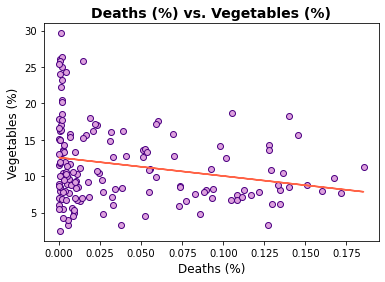

<Figure size 432x288 with 0 Axes>

In [84]:
#Creating a Scatter plot for comparing Covid Deaths and Countries Vegetable % Consumption
x = categories_clean["Deaths (%)"]
y = categories_clean["Vegetables (%)"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)
plt.show()
# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Veg.png")

The correlation between Confirmed Cases (%) and diet composition of Vegetables (%) is -0.25.


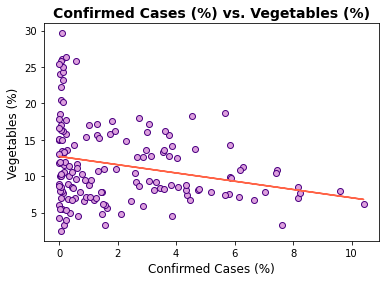

<Figure size 432x288 with 0 Axes>

In [85]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries Vegetable % Consumption
x = categories_clean["Confirmed Cases (%)"]
y = categories_clean["Vegetables (%)"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)
plt.show()
# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Veg.png")

The correlation between Deaths (%) and diet composition of Milk (%) is 0.54.


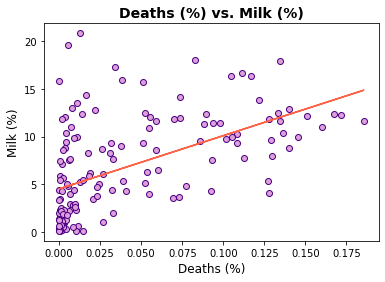

<Figure size 432x288 with 0 Axes>

In [86]:
#Creating a Scatter plot for comparing Covid Deaths and Countries Milk % Consumption
x = categories_clean["Deaths (%)"]
y = categories_clean["Milk (%)"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)
plt.show()
# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Mil.png")

The correlation between Confirmed Cases (%) and diet composition of Milk (%) is 0.58.


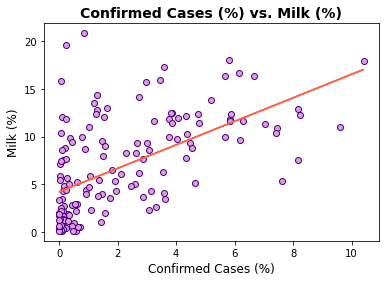

<Figure size 432x288 with 0 Axes>

In [87]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries Milk % Consumption
x = categories_clean["Confirmed Cases (%)"]
y = categories_clean["Milk (%)"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)
plt.show()
# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Mil.png")

The correlation between Deaths (%) and diet composition of Alcoholic Beverages (%) is 0.42.


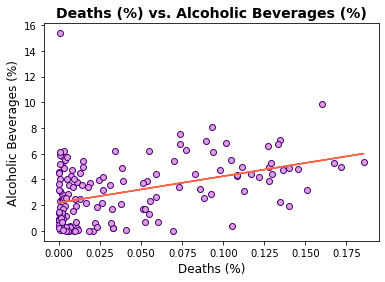

<Figure size 432x288 with 0 Axes>

In [88]:
#Creating a Scatter plot for comparing Covid Deaths and Countries Vegetal Products % Consumption
x = categories_clean["Deaths (%)"]
y = categories_clean["Alcoholic Beverages (%)"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)
plt.show()
# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Alc.png")

The correlation between Confirmed Cases (%) and diet composition of Alcoholic Beverages (%) is 0.37.


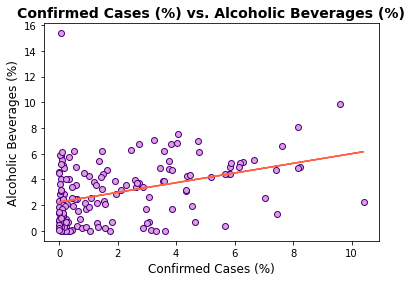

<Figure size 432x288 with 0 Axes>

In [89]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries Vegetal Products % Consumption
x = categories_clean["Confirmed Cases (%)"]
y = categories_clean["Alcoholic Beverages (%)"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)
plt.show()
# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Alc.png")

The correlation between Deaths (%) and diet composition of Vegetal Products (%) is -0.55.


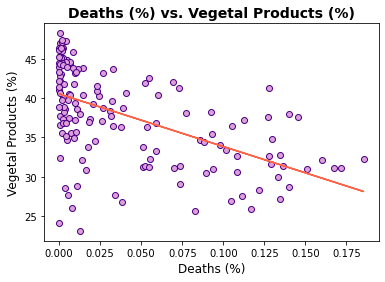

<Figure size 432x288 with 0 Axes>

In [90]:
#Creating a Scatter plot for comparing Covid Deaths and Countries Alcoholic Beverages % Consumption
x = categories_clean["Deaths (%)"]
y = categories_clean["Vegetal Products (%)"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)
plt.show()
# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Veg_Pro.png")

The correlation between Confirmed Cases (%) and diet composition of Vegetal Products (%) is -0.6.


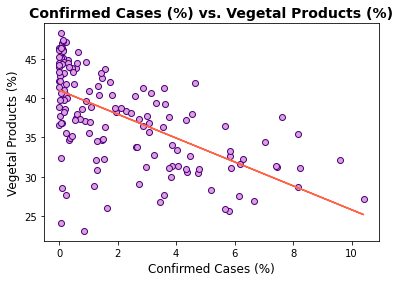

<Figure size 432x288 with 0 Axes>

In [91]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries Alcoholic Beverages % Consumption
x = categories_clean["Confirmed Cases (%)"]
y = categories_clean["Vegetal Products (%)"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)
plt.show()
# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Veg_Pro.png")

The correlation between Deaths (%) and diet composition of Animal fats (%) is 0.49.


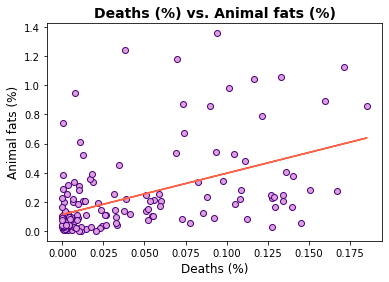

<Figure size 432x288 with 0 Axes>

In [92]:
#Creating a Scatter plot for comparing Covid Deaths and Countries Animal fats % Consumption
x = categories_clean["Deaths (%)"]
y = categories_clean["Animal fats (%)"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)
plt.show()
# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Ani_fat.png")

The correlation between Confirmed Cases (%) and diet composition of Animal fats (%) is 0.49.


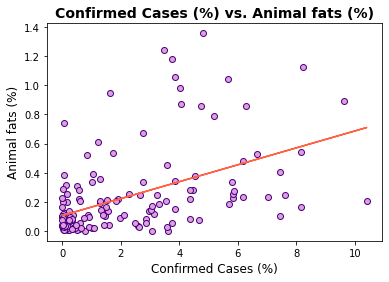

<Figure size 432x288 with 0 Axes>

In [93]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries Animal fats % Consumption
x = categories_clean["Confirmed Cases (%)"]
y = categories_clean["Animal fats (%)"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)
plt.show()
# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Ani_fat.png")

The correlation between Deaths (%) and diet composition of Cereals - Excluding Beer (%) is -0.42.


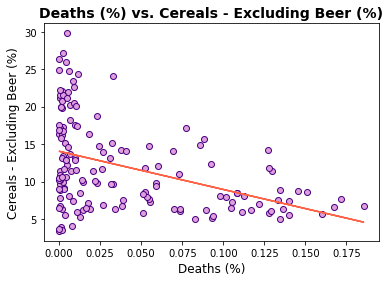

<Figure size 432x288 with 0 Axes>

In [94]:
#Creating a Scatter plot for comparing Covid Deaths and Countries Cereals - Excluding Beer % Consumption
x = categories_clean["Deaths (%)"]
y = categories_clean["Cereals - Excluding Beer (%)"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)
plt.show()
# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Cer.png")

The correlation between Confirmed Cases (%) and diet composition of Cereals - Excluding Beer (%) is -0.47.


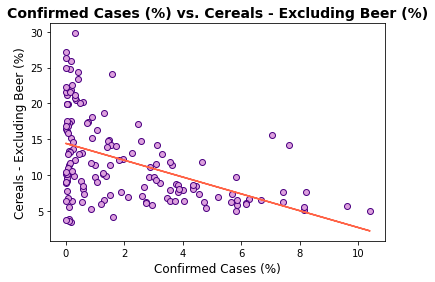

<Figure size 432x288 with 0 Axes>

In [95]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries Cereals - Excluding Beer % Consumption
x = categories_clean["Confirmed Cases (%)"]
y = categories_clean["Cereals - Excluding Beer (%)"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)
plt.show()
# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Cer.png")

The correlation between Deaths (%) and diet composition of Meats & Animal Products % is 0.54.


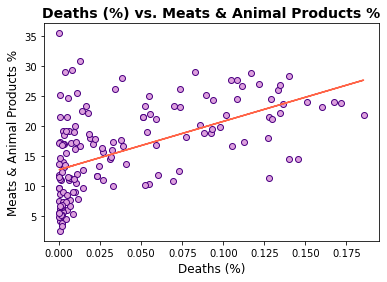

<Figure size 432x288 with 0 Axes>

In [97]:
#Creating a Scatter plot for comparing Covid Deaths and Countries 	Meats & Animal Products % Consumption
x = categories_clean["Deaths (%)"]
y = categories_clean["Meats & Animal Products %"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)
plt.show()
# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Mea.png")

The correlation between Confirmed Cases (%) and diet composition of Meats & Animal Products % is 0.59.


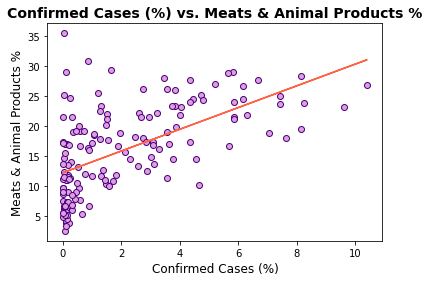

<Figure size 432x288 with 0 Axes>

In [98]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries 	Meats & Animal Products % Consumption
x = categories_clean["Confirmed Cases (%)"]
y = categories_clean["Meats & Animal Products %"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)
plt.show()
# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Mea.png")

# The Section will be for the Bar Graphs

In [99]:
#Set Country as the index
categories_clean = categories_clean.set_index('Country')

In [100]:
#First we will create a data frame with the countries we will be comparing 

#Create the date frame with the 5 countries we will be using and reset the index. We will display the new dataframe
bar_countries = categories_clean.loc[("United States of America", "Belgium", "Slovenia", "United Republic of Tanzania", "Vietnam"),:]
bar_countries


,Alcoholic Beverages (%),Animal fats (%),Cereals - Excluding Beer (%),Fruits (%),Milk (%),Stimulants (%),Vegetable Oils (%),Vegetal Products (%),Obesity (%),Undernourished (%),Confirmed Cases (%),Deaths (%),Recovered (%),Active (%),Population,Meats & Animal Products %,Sugars (%),Aquatic Seafood (%),Vegetables (%),Other (%)
Country,,,,,,,,,,,,,,,,,,,,
United States of America,4.8647,0.1681,5.5048,4.5432,12.8657,0.2458,0.9889,28.7587,37.3,<2.5,8.159922,0.140103,0.000000,8.019819,329878000.0,28.3054,3.3200,1.1307,8.5639,0.7401
Belgium,5.3730,0.8559,6.6704,4.1623,11.6344,0.2461,0.5640,32.2637,24.5,<2.5,6.286322,0.185428,0.000000,6.100894,11515000.0,21.8321,3.6514,1.1335,11.2318,0.3815
Slovenia,4.9933,1.1248,7.6345,6.4367,12.2569,0.2615,0.4739,31.0774,22.5,<2.5,8.235901,0.171755,7.312934,0.751213,2103000.0,23.8061,2.4915,0.6520,7.6857,1.1057
United Republic of Tanzania,4.5185,0.0403,10.4453,6.8147,3.3606,0.0300,0.9136,45.1973,7.1,30.7,0.000852,0.000035,0.000306,0.000511,59734000.0,5.6224,1.0345,0.5828,17.8890,3.5508
Vietnam,1.4591,0.1640,16.8740,5.9029,0.6069,0.2880,0.2201,41.4232,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,13.7373,2.0996,2.6434,13.0104,1.5712


In [101]:
bar_countries = bar_countries.reset_index()

In [105]:
#Used a function to help wrap labels in the bar graph
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

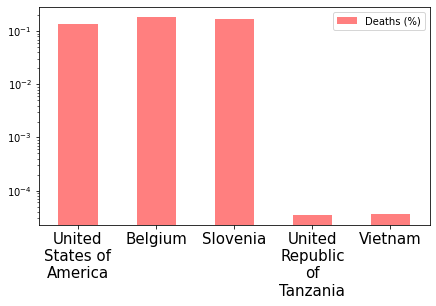

In [110]:
# Create the bar graph and save a png for us to use
bg = bar_countries.plot.bar(x= 'Country', y = 'Deaths (%)', color='r', alpha=0.5, align="center", figsize=(7,4), xlabel = "", logy = True) 
bg.set_xticklabels(bar_countries["Country"], verticalalignment = 'top', rotation=0, fontsize = 15)
wrap_labels(bg, 10)
bg
plt.savefig("Saved Graphs\Bar_Gra_Cou_Vs_Dea.png")

# This section is the Pie Graphs

In [24]:
#Going to create a dataframe with only columns of the food categories so dropping any columns we are not using and display it
food_categories_df = categories_clean.loc[:, categories_clean.columns.drop(['Obesity (%)', 'Undernourished (%)', 'Confirmed Cases (%)', 'Deaths (%)','Recovered (%)', 'Active (%)', 'Population'])]
food_categories_df.head()

,Alcoholic Beverages (%),Animal fats (%),Cereals - Excluding Beer (%),Fruits (%),Milk (%),Stimulants (%),Vegetable Oils (%),Vegetal Products (%),Meats & Animal Products %,Sugars (%),Aquatic Seafood (%),Vegetables (%),Other (%)
Country,,,,,,,,,,,,,
Afghanistan,0.0014,0.1973,24.8097,5.3495,7.5828,0.3078,0.5345,40.5645,11.0517,1.3489,0.0350,7.6444,0.5725
Albania,1.6719,0.1357,5.7817,6.7861,15.7213,0.1055,0.3261,31.2304,21.4668,1.5367,0.2126,13.5849,1.4403
Algeria,0.2711,0.0282,13.6816,6.3801,7.6189,0.2216,1.0310,40.3651,11.3786,1.8342,0.2416,15.7824,1.1656
Angola,5.8087,0.0560,9.1085,6.0005,0.8311,0.0508,0.6463,45.0722,7.1986,1.8495,1.7707,20.4143,1.1928
Argentina,4.2672,0.2234,8.4102,6.0435,10.2328,0.4378,0.9541,30.6559,27.7633,3.0536,0.4693,7.3923,0.0966


In [38]:
# Created a list that contains all of the categories we will be using in the pie chart and display it
food_cat_lis = list(food_categories_df.columns.values)
del food_cat_lis[0]
food_cat_lis

['Animal fats (%)',
 'Cereals - Excluding Beer (%)',
 'Fruits (%)',
 'Milk (%)',
 'Stimulants (%)',
 'Vegetable Oils (%)',
 'Vegetal Products (%)',
 'Meats & Animal Products %',
 'Sugars (%)',
 'Aquatic Seafood (%)',
 'Vegetables (%)',
 'Other (%)']

In [218]:
# Going create a function to create the Pie Graphs
def pie_graph(sizes, categories, title):    

    plt.pie(sizes, shadow=True, radius = 2.5) 
    labels = [f'{l}, {s:0.1f}%' for l, s in zip(categories, sizes)]
    plt.title(title, pad=150, fontsize = 25) 
  
    plt.legend(title= 'Food Categories', title_fontsize = 20, labels = labels, loc = 'center left',prop={'size': 15}, bbox_to_anchor=(-2.5, 0, 0.5, 1))
    plt.show()
    

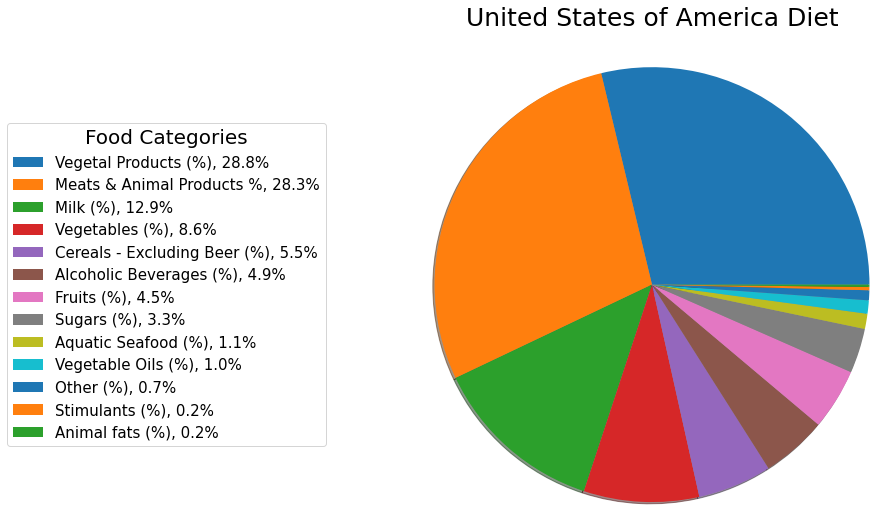

<Figure size 432x288 with 0 Axes>

In [225]:
#Creating Pie Chart for United State of America Diet
country = food_categories_df.loc["United States of America",:]
country.sort_values(inplace= True, ascending = False)
pie_graph(country.values, country.index, "United States of America Diet")
plt.savefig(f"Saved Graphs\Pie_USA.png")

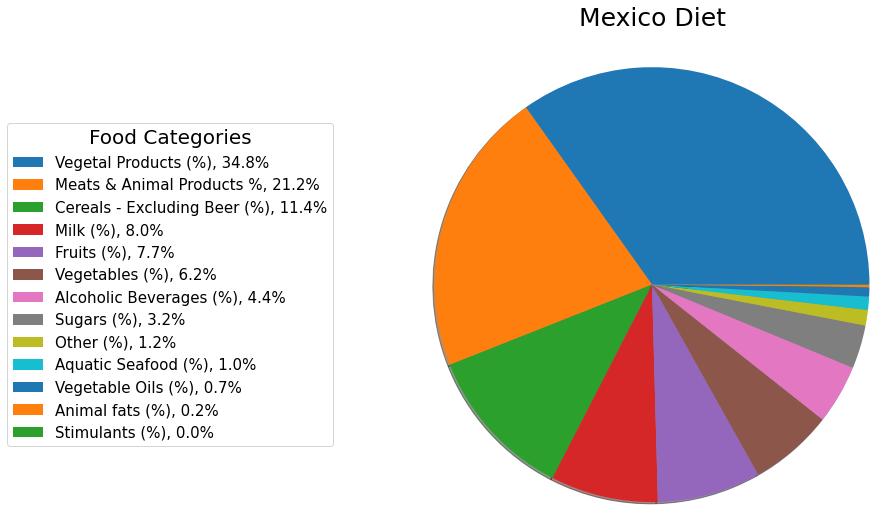

<Figure size 432x288 with 0 Axes>

In [221]:
#Creating Pie Chart for Mexico Diet
country = food_categories_df.loc["Mexico",:]
country.sort_values(inplace= True, ascending = False)
pie_graph(country.values, country.index, "Mexico Diet")
plt.savefig(f"Saved Graphs\Pie_Mex.png")

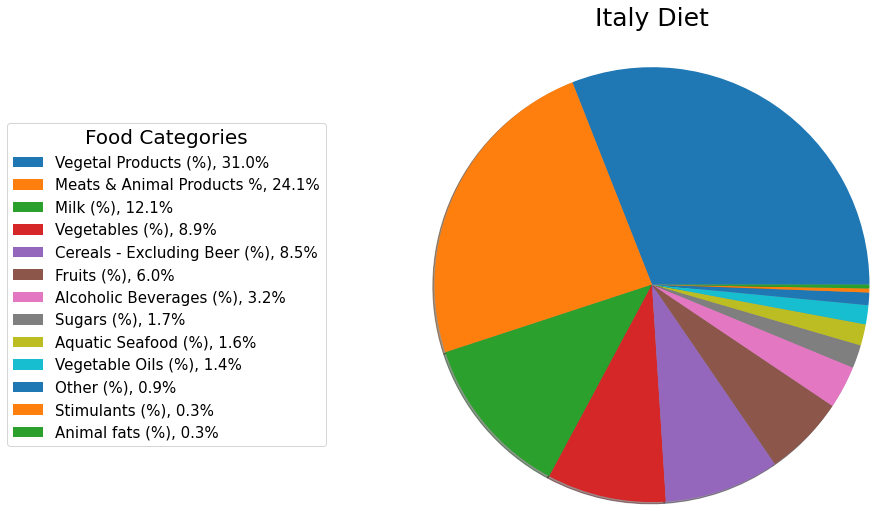

<Figure size 432x288 with 0 Axes>

In [223]:
#Creating Pie Chart for Italy Diet
country = food_categories_df.loc["Italy",:]
country.sort_values(inplace= True, ascending = False)
pie_graph(country.values, country.index, "Italy Diet")
plt.savefig(f"Saved Graphs\Pie_Italy.png")

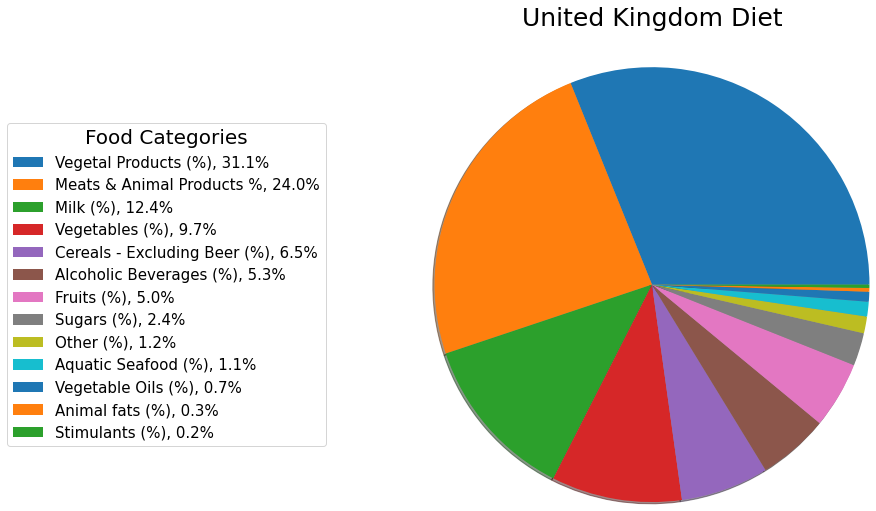

<Figure size 432x288 with 0 Axes>

In [224]:
#Creating Pie Chart for India Diet
country = food_categories_df.loc["United Kingdom",:]
country.sort_values(inplace= True, ascending = False)
pie_graph(country.values, country.index, "United Kingdom Diet")
plt.savefig(f"Saved Graphs\Pie_UK.png")

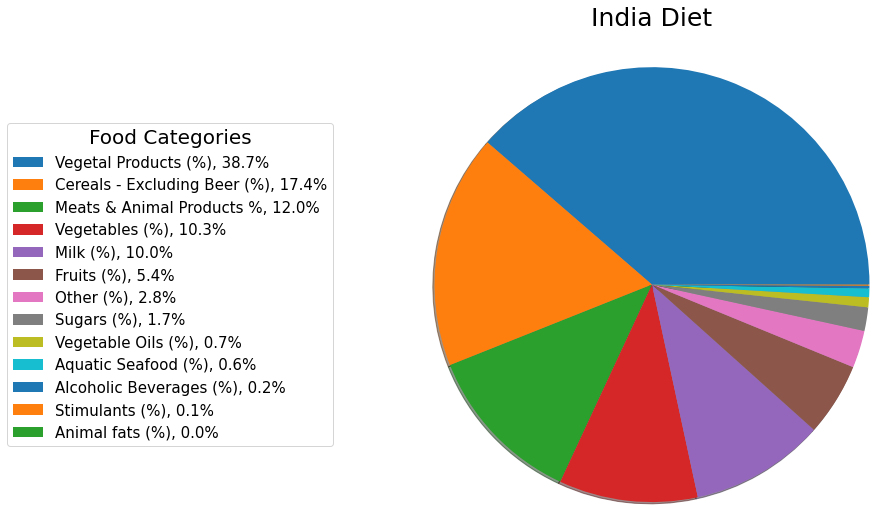

<Figure size 432x288 with 0 Axes>

In [226]:
#Creating Pie Chart for India Diet
country = food_categories_df.loc["India",:]
country.sort_values(inplace= True, ascending = False)
pie_graph(country.values, country.index, "India Diet")
plt.savefig(f"Saved Graphs\Pie_India.png")

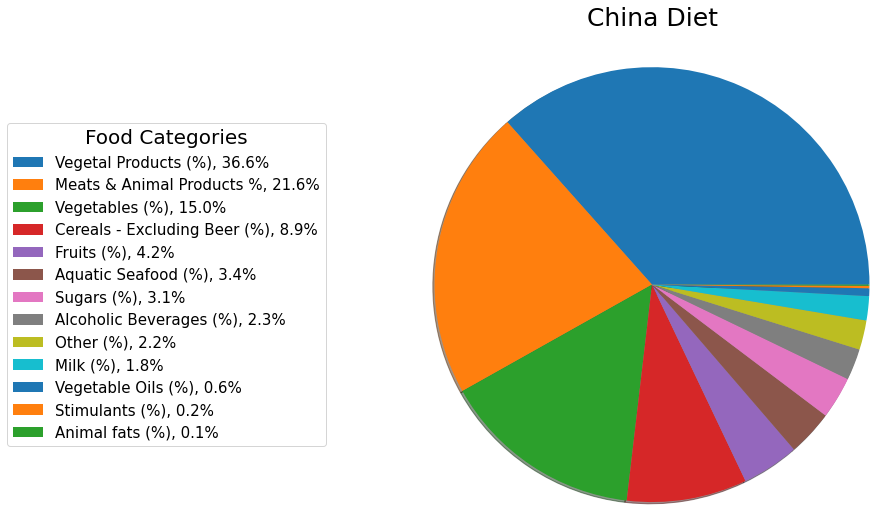

<Figure size 432x288 with 0 Axes>

In [227]:
#Creating Pie Chart for China Diet
country = food_categories_df.loc["China",:]
country.sort_values(inplace= True, ascending = False)
pie_graph(country.values, country.index, "China Diet")
plt.savefig(f"Saved Graphs\Pie_China.png")